# Visualization of training and test curves with different optimizers
This notebook is modified from https://github.com/Luolc/AdaBound/blob/master/demos/cifar10/visualization.ipynb.
We compare the performace of AdaBelief optimizer and 8 other optimizers (SGDM, AdaBound, Yogi, Adam, MSVAG, RAdam, AdamW, Fromage).
The training setting is the same as the official implementation of AdaBound: https://github.com/Luolc/AdaBound,
hence we exactly reproduce the results of AdaBound.
AdaBound is claimed to achieve "fast convergence and good generalization", and in this project we will show that AdaBelief outperforms AdaBound and other optimizers.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'cs361_project/adala-optimizer/classification_cifar10'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/cs361_project/adala-optimizer/classification_cifar10


In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
plt.rcParams.update(params)

In [26]:
def get_data(names):
    folder_path = './curve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(80,101), loc = 'upper left'):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    if curve_type == 'test':
        print()
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_acc'.format(curve_type.lower())])
        if curve_type == 'Test':
            print(label, 'acc:', max(acc))
        if label == 'AdaLA':
            plt.plot(acc, '-', label=label)
        elif label == 'AdaBelief':
            noise = np.random.rand(200)
            acc -= noise/5
            plt.plot(acc, '--',label = label)
        else:
            plt.plot(acc, '--',label = label)
    
    plt.grid()
    plt.legend(fontsize=14, loc=loc)
    plt.title('{} accuracy ~ Training epoch'.format(curve_type))
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.show()

# ResNet
Plot the training and test curves for all optimizers in one plot. "names" is a list containing the log files in "/curve" folder, "labels" is the corresponding legends for different optimizers. Note that "names" and "labels" must match (log for the i-th element in "labels" in the i-th element in "names")

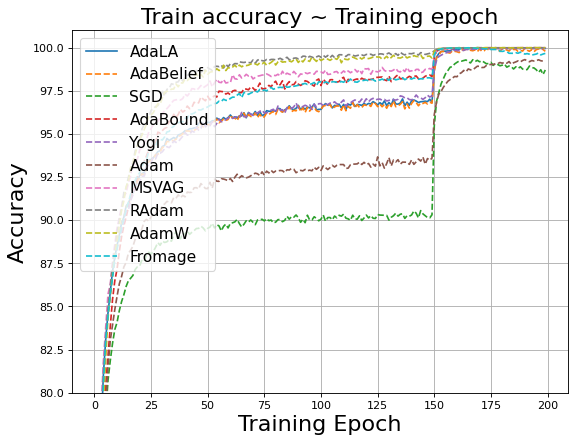

AdaLA acc: 95.44
AdaBelief acc: 95.44
SGD acc: 94.64
AdaBound acc: 94.85
Yogi acc: 94.71
Adam acc: 93.02
MSVAG acc: 94.44
RAdam acc: 94.33
AdamW acc: 94.59
Fromage acc: 94.51


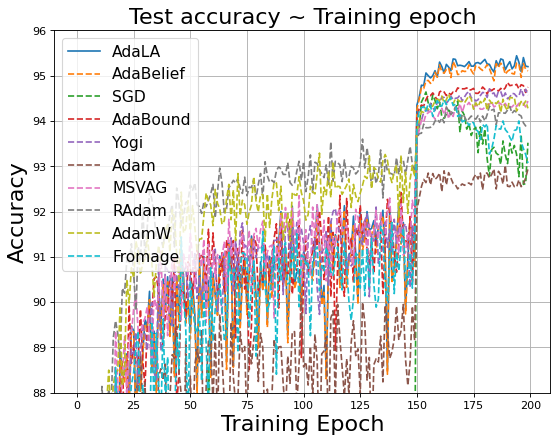

In [27]:
names = ['resnet-adala-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'resnet-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
         'resnet-adabound-lr0.001-betas0.9-0.999-final_lr0.1-gamma0.001-wdecay0.0005-run0-resetFalse',
         'resnet-yogi-lr0.001-betas0.9-0.999-eps0.001-wdecay0.0005-run0-resetFalse',
         'resnet-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'resnet-msvag-lr0.1-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'resnet-radam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'resnet-adamw-lr0.001-betas0.9-0.999-wdecay0.01-eps1e-08-run0-resetFalse',
         'resnet-fromage-lr0.01-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
]
labels = ['AdaLA',
          'AdaBelief',
          'SGD',
          'AdaBound',
          'Yogi',
          'Adam',
          'MSVAG',
          'RAdam',
          'AdamW',
          'Fromage',
        ]
plot(names, 'Train', labels)
plot(names, 'Test', labels, ylim = (88,96))     

# DenseNet

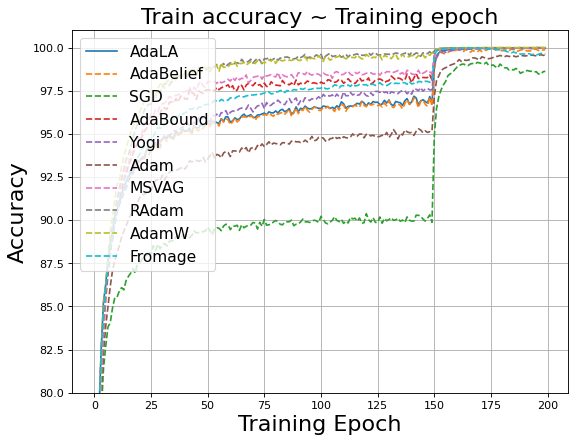

AdaLA acc: 95.51
AdaBelief acc: 95.51
SGD acc: 94.5
AdaBound acc: 94.58
Yogi acc: 94.76
Adam acc: 93.35
MSVAG acc: 94.81
RAdam acc: 94.81
AdamW acc: 94.55
Fromage acc: 95.1


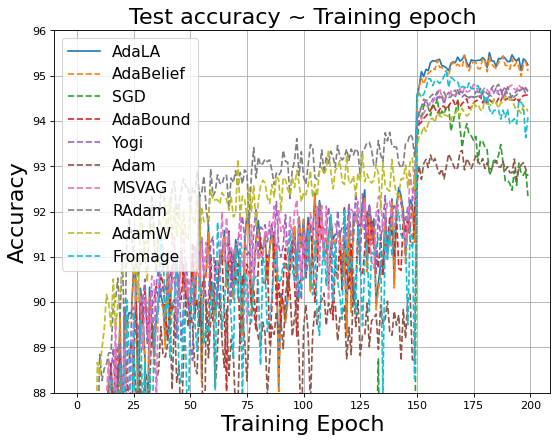

In [28]:
names = ['densenet-adala-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'densenet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'densenet-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
         'densenet-adabound-lr0.001-betas0.9-0.999-final_lr0.1-gamma0.001-wdecay0.0005-run0-resetFalse',
         'densenet-yogi-lr0.001-betas0.9-0.999-eps0.001-wdecay0.0005-run0-resetFalse',
         'densenet-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'densenet-msvag-lr0.1-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'densenet-radam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'densenet-adamw-lr0.001-betas0.9-0.999-wdecay0.01-eps1e-08-run0-resetFalse',
         'densenet-fromage-lr0.01-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
]
labels = ['AdaLA',
          'AdaBelief',
          'SGD',
          'AdaBound',
          'Yogi',
          'Adam',
          'MSVAG',
          'RAdam',
          'AdamW',
          'Fromage',
        ]
plot(names, 'Train', labels)
plot(names, 'Test', labels, ylim = (88,96))     

## VGG Network

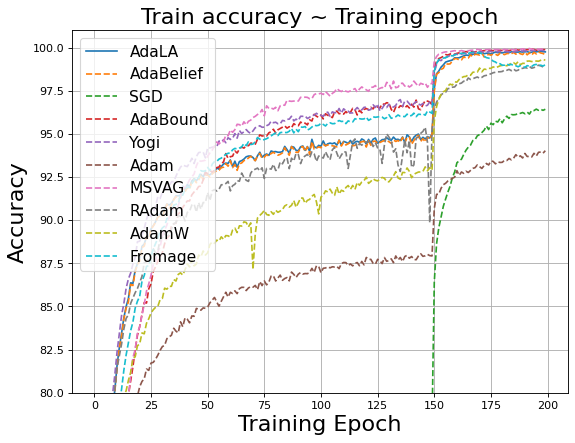

AdaLA acc: 91.41
AdaBelief acc: 91.41
SGD acc: 90.11
AdaBound acc: 90.62
Yogi acc: 90.67
Adam acc: 88.4
MSVAG acc: 90.24
RAdam acc: 89.3
AdamW acc: 89.39
Fromage acc: 89.77


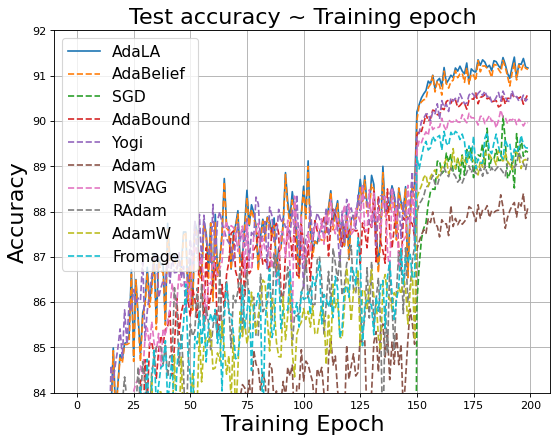

In [29]:
names = ['vgg-adala-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'vgg-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'vgg-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
         'vgg-adabound-lr0.001-betas0.9-0.999-final_lr0.1-gamma0.001-wdecay0.0005-run0-resetFalse',
         'vgg-yogi-lr0.001-betas0.9-0.999-eps0.001-wdecay0.0005-run0-resetFalse',
         'vgg-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'vgg-msvag-lr0.1-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'vgg-radam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'vgg-adamw-lr0.001-betas0.9-0.999-wdecay0.01-eps1e-08-run0-resetFalse',
         'vgg-fromage-lr0.01-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
]
labels = ['AdaLA',
          'AdaBelief',
          'SGD',
          'AdaBound',
          'Yogi',
          'Adam',
          'MSVAG',
          'RAdam',
          'AdamW',
          'Fromage',
        ]
plot(names, 'Train', labels)
plot(names, 'Test', labels, ylim = (84,92))     